<a href="https://colab.research.google.com/github/quaziharis/machine_Learning/blob/master/TelecomChurnFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas --upgrade pandas_profiling

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)
     |████████████████████████████████| 245kB 6.9MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 1.5MB 13.1MB/s 
     |████████████████████████████████| 614kB 44.0MB/s 
     |████████████████████████████████| 8.7MB 50.9MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 296kB 62.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=38844613eb990b96f7c490349f2ec0f77ce3be4fc2f435d7551ee8e75068d011
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for tangled-up-in-unicode: filename=tangled_up_in_unicode-0.0.4-cp36-none-any.whl size=1545723 sha256=aa4f608fafc24e7856af78261075bb778f030c50eda61e7ec422bb68d3f4085a
  Stored in directory: /ro

In [0]:
import pandas as pd
import pandas_profiling 
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
df=pd.read_csv("/content/telecomchurn.csv")
print(df.head())
df=df.fillna(df.mean())
df = df.dropna()
df=df.drop(columns=['CustomerID','ServiceArea'],axis=1)

   CustomerID Churn  MonthlyRevenue  ...  PrizmCode    Occupation  MaritalStatus
0     3000002   Yes           24.00  ...   Suburban  Professional             No
1     3000010   Yes           16.99  ...   Suburban  Professional            Yes
2     3000014    No           38.00  ...       Town        Crafts            Yes
3     3000022    No           82.28  ...      Other         Other             No
4     3000026   Yes           17.14  ...      Other  Professional            Yes

[5 rows x 58 columns]


In [0]:
pandas_profiling.ProfileReport(df)

In [0]:
import seaborn as sns
sns.pairplot(df)

In [0]:
  encoded = pd.get_dummies(df[['HandsetPrice','CreditRating','PrizmCode','Occupation','MaritalStatus']], drop_first=True)
  df=df.join(encoded)
  le = preprocessing.LabelEncoder()
  df['Churn']= le.fit_transform(df['Churn']) 
  df['ChildrenInHH']= le.fit_transform(df['ChildrenInHH']) 
  df['HandsetRefurbished']= le.fit_transform(df['HandsetRefurbished']) 
  df['HandsetWebCapable']= le.fit_transform(df['HandsetWebCapable'])  
  df['TruckOwner']= le.fit_transform(df['TruckOwner'])  
  df['RVOwner']= le.fit_transform(df['RVOwner'])  
  df['Homeownership']= le.fit_transform(df['Homeownership'])  
  df['BuysViaMailOrder']= le.fit_transform(df['BuysViaMailOrder'])  
  df['RespondsToMailOffers']= le.fit_transform(df['RespondsToMailOffers'])
  df['OptOutMailings']= le.fit_transform(df['OptOutMailings'])   
  df['NonUSTravel']= le.fit_transform(df['NonUSTravel'])   
  df['OwnsComputer']= le.fit_transform(df['OwnsComputer'])  
  df['HasCreditCard']= le.fit_transform(df['HasCreditCard']) 
  df['NewCellphoneUser']= le.fit_transform(df['NewCellphoneUser'])
  df['NotNewCellphoneUser']= le.fit_transform(df['NotNewCellphoneUser'])
  df['OwnsMotorcycle']= le.fit_transform(df['OwnsMotorcycle'])
  df['MadeCallToRetentionTeam']= le.fit_transform(df['MadeCallToRetentionTeam'])


In [0]:
x =df.drop(columns=['Churn','HandsetPrice','CreditRating','PrizmCode','Occupation','MaritalStatus'],axis=1)
x1=x
y=df['Churn']
sc=MinMaxScaler()
x=sc.fit_transform(x)


In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,shuffle='True',stratify=y)
print("...........Random Forest Classifier........")
clf=RandomForestClassifier()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("Acc for training",clf.score(xtrain,ytrain))
print("Acc for testing",clf.score(xtest,ytest))
print("................................................")
print("................................................")
print("...........Decision Tree Classifier.............")
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred2=dtc.predict(xtest)
print(confusion_matrix(ytest,ypred2))
print(classification_report(ytest,ypred2))
print("Acc for training",dtc.score(xtrain,ytrain))
print("Acc for testing",dtc.score(xtest,ytest))
print("................................................")
print("................................................")
print(".............Logistic Regression................")
logr=LogisticRegression()
logr.fit(xtrain,ytrain)
ypred3=logr.predict(xtest)
print(confusion_matrix(ytest,ypred3))
print(classification_report(ytest,ypred3))
print("Acc for training",logr.score(xtrain,ytrain))
print("Acc for testing",logr.score(xtest,ytest))
print("................................................")
print("................................................")
print(".............K Neighbors Classifier..............")
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred4=logr.predict(xtest)
print(confusion_matrix(ytest,ypred4))
print(classification_report(ytest,ypred4))
print("Acc for training",knn.score(xtrain,ytrain))
print("Acc for testing",knn.score(xtest,ytest))

...........Random Forest Classifier........
[[10644   253]
 [ 4086   324]]
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10897
           1       0.56      0.07      0.13      4410

    accuracy                           0.72     15307
   macro avg       0.64      0.53      0.48     15307
weighted avg       0.68      0.72      0.63     15307

Acc for training 1.0
Acc for testing 0.7165349186646632
................................................
................................................
...........Decision Tree Classifier.............
[[7955 2942]
 [2782 1628]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     10897
           1       0.36      0.37      0.36      4410

    accuracy                           0.63     15307
   macro avg       0.55      0.55      0.55     15307
weighted avg       0.63      0.63      0.63     15307

Acc for training 1.0
Acc for testing 0.62

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[10789   108]
 [ 4300   110]]
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10897
           1       0.50      0.02      0.05      4410

    accuracy                           0.71     15307
   macro avg       0.61      0.51      0.44     15307
weighted avg       0.65      0.71      0.60     15307

Acc for training 0.7114178519431067
Acc for testing 0.7120271771085125
................................................
................................................
.............K Neighbors Classifier..............
[[10789   108]
 [ 4300   110]]
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10897
           1       0.50      0.02      0.05      4410

    accuracy                           0.71     15307
   macro avg       0.61      0.51      0.44     15307
weighted avg       0.65      0.71      0.60     15307

Acc for training 0.8010975473177288
Acc for testing 0.64153655190

In [0]:
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)
###performing under sampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
# fit and apply the transform
xover, yover = undersample.fit_resample(x,y)
xtrain1,xtest1,ytrain1,ytest1=train_test_split(xover,yover,test_size=0.3,shuffle='True',stratify=yover)
print("...........Random Forest Classifier........")
clf1=RandomForestClassifier()
clf1.fit(xtrain1,ytrain1)
y_pred=clf1.predict(xtest1)
print(confusion_matrix(ytest1,y_pred))
print(classification_report(ytest1,y_pred))
print("Acc for training",clf1.score(xtrain1,ytrain1))
print("Acc for testing",clf1.score(xtest1,ytest1))


Counter({0: 36324, 1: 14699})


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


...........Random Forest Classifier........
[[2713 1697]
 [1753 2657]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      4410
           1       0.61      0.60      0.61      4410

    accuracy                           0.61      8820
   macro avg       0.61      0.61      0.61      8820
weighted avg       0.61      0.61      0.61      8820

Acc for training 1.0
Acc for testing 0.608843537414966


In [0]:
###performing over sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# fit and apply the transform
xover1, yover1 = oversample.fit_resample(x,y)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(xover1,yover1,test_size=0.3,shuffle='True',stratify=yover1)
print("...........Random Forest Classifier........")
clf2=RandomForestClassifier()
clf2.fit(xtrain2,ytrain2)
y_pred2=clf2.predict(xtest2)
print(confusion_matrix(ytest2,y_pred2))
print(classification_report(ytest2,y_pred2))
print("Acc for training",clf2.score(xtrain2,ytrain2))
print("Acc for testing",clf2.score(xtest2,ytest2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


...........Random Forest Classifier........
[[9642 1255]
 [3205 7693]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81     10897
           1       0.86      0.71      0.78     10898

    accuracy                           0.80     21795
   macro avg       0.81      0.80      0.79     21795
weighted avg       0.81      0.80      0.79     21795

Acc for training 1.0
Acc for testing 0.7953659096122964


In [0]:
from imblearn.combine import SMOTEENN
# define sampling strategy
sample = SMOTEENN()
# fit and apply the transform
xover2, yover2 = sample.fit_resample(x, y)
xtrain3,xtest3,ytrain3,ytest3=train_test_split(xover2,yover2,test_size=0.3,shuffle='True',stratify=yover2)
print("...........Random Forest Classifier........")
clf3=RandomForestClassifier()
clf3.fit(xtrain3,ytrain3)
y_pred3=clf3.predict(xtest3)
print(confusion_matrix(ytest3,y_pred3))
print(classification_report(ytest3,y_pred3))
print("Acc for training",clf3.score(xtrain3,ytrain3))
print("Acc for testing",clf3.score(xtest3,ytest3))
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(xtrain3,ytrain3)
y_pred3=ad.predict(xtest3)
print(confusion_matrix(ytest3,y_pred3))
print(classification_report(ytest3,y_pred3))
print("Acc for training",ad.score(xtrain3,ytrain3))
print("Acc for testing",ad.score(xtest3,ytest3))
ad1=AdaBoostClassifier(RandomForestClassifier())
ad1.fit(xtrain3,ytrain3)
y_pred3=ad1.predict(xtest3)
print(confusion_matrix(ytest3,y_pred3))
print(classification_report(ytest3,y_pred3))
print("Acc for training",ad1.score(xtrain3,ytrain3))
print("Acc for testing",ad1.score(xtest3,ytest3))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

...........Random Forest Classifier........
[[2483 1014]
 [ 606 5655]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      3497
           1       0.85      0.90      0.87      6261

    accuracy                           0.83      9758
   macro avg       0.83      0.81      0.81      9758
weighted avg       0.83      0.83      0.83      9758

Acc for training 1.0
Acc for testing 0.8339823734371797
[[2216 1281]
 [ 799 5462]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      3497
           1       0.81      0.87      0.84      6261

    accuracy                           0.79      9758
   macro avg       0.77      0.75      0.76      9758
weighted avg       0.78      0.79      0.78      9758

Acc for training 0.7824922036280582
Acc for testing 0.7868415658946506
[[2495 1002]
 [ 601 5660]]
              precision    recall  f1-score   support

           0       0.81      0.71      

In [0]:
print(clf.feature_importances_)

[4.41441286e-02 4.83417362e-02 3.09456956e-02 2.13008773e-02
 2.82832422e-02 1.94026997e-02 4.95649746e-02 4.25846202e-02
 2.98878566e-02 2.62612215e-02 3.64225855e-02 1.89787108e-02
 1.09601876e-02 3.60385323e-02 3.47264180e-02 2.68564935e-02
 3.87614883e-02 3.72376623e-02 3.22410854e-02 5.54067189e-04
 1.77101481e-02 4.24571146e-02 1.17530192e-02 7.81737545e-03
 9.77440811e-03 7.82512591e-03 5.92797553e-02 2.82803532e-02
 2.11317406e-02 5.41973041e-03 5.42222981e-03 4.70861355e-03
 4.74475314e-03 3.32606237e-03 4.46140193e-03 4.51382375e-03
 4.59866043e-03 1.42528257e-03 2.67009690e-03 4.75015034e-03
 4.38385652e-03 3.04288053e-03 1.01284300e-03 5.95023769e-03
 4.77749743e-03 2.90546670e-03 2.07148150e-02 1.19320141e-03
 2.26367689e-03 2.81471077e-03 1.17463973e-03 1.81804951e-03
 2.78751108e-03 3.17348845e-05 1.42784340e-03 1.85719925e-06
 1.09412307e-04 3.71685748e-03 1.93900887e-05 4.71356219e-04
 7.12033099e-05 0.00000000e+00 1.84563350e-03 1.95451526e-03
 3.90156271e-03 6.650496

In [0]:
x.columns

AttributeError: ignored

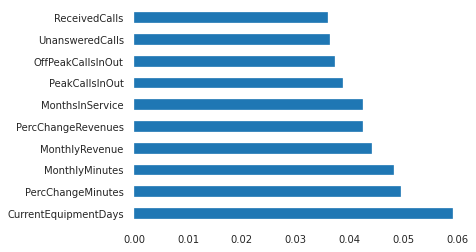

In [0]:
feature_imp=pd.Series(clf.feature_importances_,index=x1.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
x2=df[['CurrentEquipmentDays','PercChangeMinutes','MonthlyMinutes','MonthlyRevenue','PercChangeRevenues','MonthsInService','PeakCallsInOut','OffPeakCallsInOut','ReceivedCalls','UnansweredCalls']]

In [0]:
x2.head()

In [0]:
x2=sc.fit_transform(x2)

In [0]:
xover3, yover3 = sample.fit_resample(x2, y)
xtrain4,xtest4,ytrain4,ytest4=train_test_split(xover3,yover3,test_size=0.3,shuffle='True',stratify=yover3)
print("...........Random Forest Classifier........")
model=RandomForestClassifier()
model.fit(xtrain4,ytrain4)
y_predict=model.predict(xtest4)
print(confusion_matrix(ytest4,y_predict))
print(classification_report(ytest4,y_predict))
print("Acc for training",model.score(xtrain4,ytrain4))
print("Acc for testing",model.score(xtest4,ytest4))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

...........Random Forest Classifier........
[[2424 1360]
 [ 372 6793]]
              precision    recall  f1-score   support

           0       0.87      0.64      0.74      3784
           1       0.83      0.95      0.89      7165

    accuracy                           0.84     10949
   macro avg       0.85      0.79      0.81     10949
weighted avg       0.84      0.84      0.84     10949

Acc for training 1.0
Acc for testing 0.8418120376290072


...........Random Forest Classifier........
[[2373 1411]
 [ 390 6775]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.72      3784
           1       0.83      0.95      0.88      7165

    accuracy                           0.84     10949
   macro avg       0.84      0.79      0.80     10949
weighted avg       0.84      0.84      0.83     10949

Acc for training 1.0
Acc for testing 0.8355100922458673
...........Random Forest Classifier........
[[2422 1362]
 [ 380 6785]]
              precision    recall  f1-score   support

           0       0.86      0.64      0.74      3784
           1       0.83      0.95      0.89      7165

    accuracy                           0.84     10949
   macro avg       0.85      0.79      0.81     10949
weighted avg       0.84      0.84      0.83     10949

Acc for training 1.0
Acc for testing 0.8408987122111609
...........Random Forest Classifier........
[[2443 1341]
 [ 384 6781]]
              precisi

ValueError: ignored

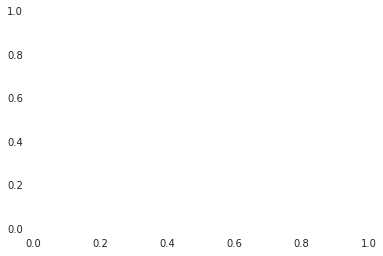

In [0]:
  scorelist_testing=[]
  scorelist_training=[]
  iteration=[]
  for i in range (0,5):
    from sklearn.model_selection import train_test_split
    xtrain4,xtest4,ytrain4,ytest4=train_test_split(xover3,yover3,test_size=0.3,shuffle='True',stratify=yover3)
    print("...........Random Forest Classifier........")
    model=RandomForestClassifier()
    model.fit(xtrain4,ytrain4)
    y_predict=model.predict(xtest4)
    print(confusion_matrix(ytest4,y_predict))
    print(classification_report(ytest4,y_predict))
    print("Acc for training",model.score(xtrain4,ytrain4))
    print("Acc for testing",model.score(xtest4,ytest4))    
    iteration.append(i)
  plt.plot(iteration,scorelist_training,label='Training_score')
  plt.plot(iteration,scorelist_testing,label='Testing_score')
  plt.legend()